In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import models

In [3]:
model = models.load_model("ol_model.h5")

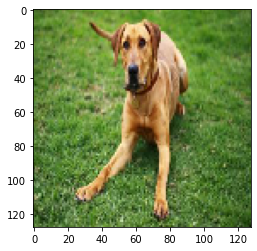

In [6]:
from tensorflow.keras.preprocessing import image
img = image.img_to_array(image.load_img(r"C:\Users\anshu\Pictures\dog.jpg",target_size=(128,128)))
plt.imshow(img.astype('int32'))
plt.show()

In [7]:
from tensorflow.keras.applications import resnet50

In [8]:
img2 = img.copy()
img2 = resnet50.preprocess_input(img2)
model.predict(img2.reshape(1,128,128,3))

[array([[8.9943508e-14, 4.0567916e-06, 2.1445681e-10, 1.3930247e-09,
         9.8301953e-09, 1.8085271e-10, 1.5170142e-08, 1.3835057e-05,
         8.8315646e-06, 8.5709145e-04, 8.8156452e-13, 3.3176474e-02,
         9.6260637e-01, 8.2940852e-07, 1.7668791e-04, 2.8588476e-08,
         3.1558236e-03, 5.9443145e-10, 1.2573935e-10, 6.8193472e-11]],
       dtype=float32),
 array([[20.43383  ,  2.9421213, 73.167366 , 88.17677  ]], dtype=float32)]

In [9]:
img3 = cv2.resize(img,(150,150))
img3.shape

(150, 150, 3)

In [12]:
vid = cv2.VideoCapture(r"C:\Users\anshu\Downloads\video3.mp4")
while True:
    flag,img = vid.read()
    if flag:
        img = cv2.resize(img,(128,128))
        img2 = img.copy()
        img2 = resnet50.preprocess_input(img2)
        preds = model.predict(img2.reshape(1,128,128,3))
        bb = preds[1][0]
        cv2.rectangle(img,(int(bb[0]),int(bb[1])),(int(bb[2]),int(bb[3])),[255,0,0],2)
        cv2.imshow("myvideo",img)
        
        if cv2.waitKey(1) & 0xFF==ord('q'):
            break
    else:
        break
vid.release()
cv2.destroyAllWindows()

In [11]:
bb

array([14.594877, 32.801487, 90.49691 , 97.55103 ], dtype=float32)